# Group : MI4

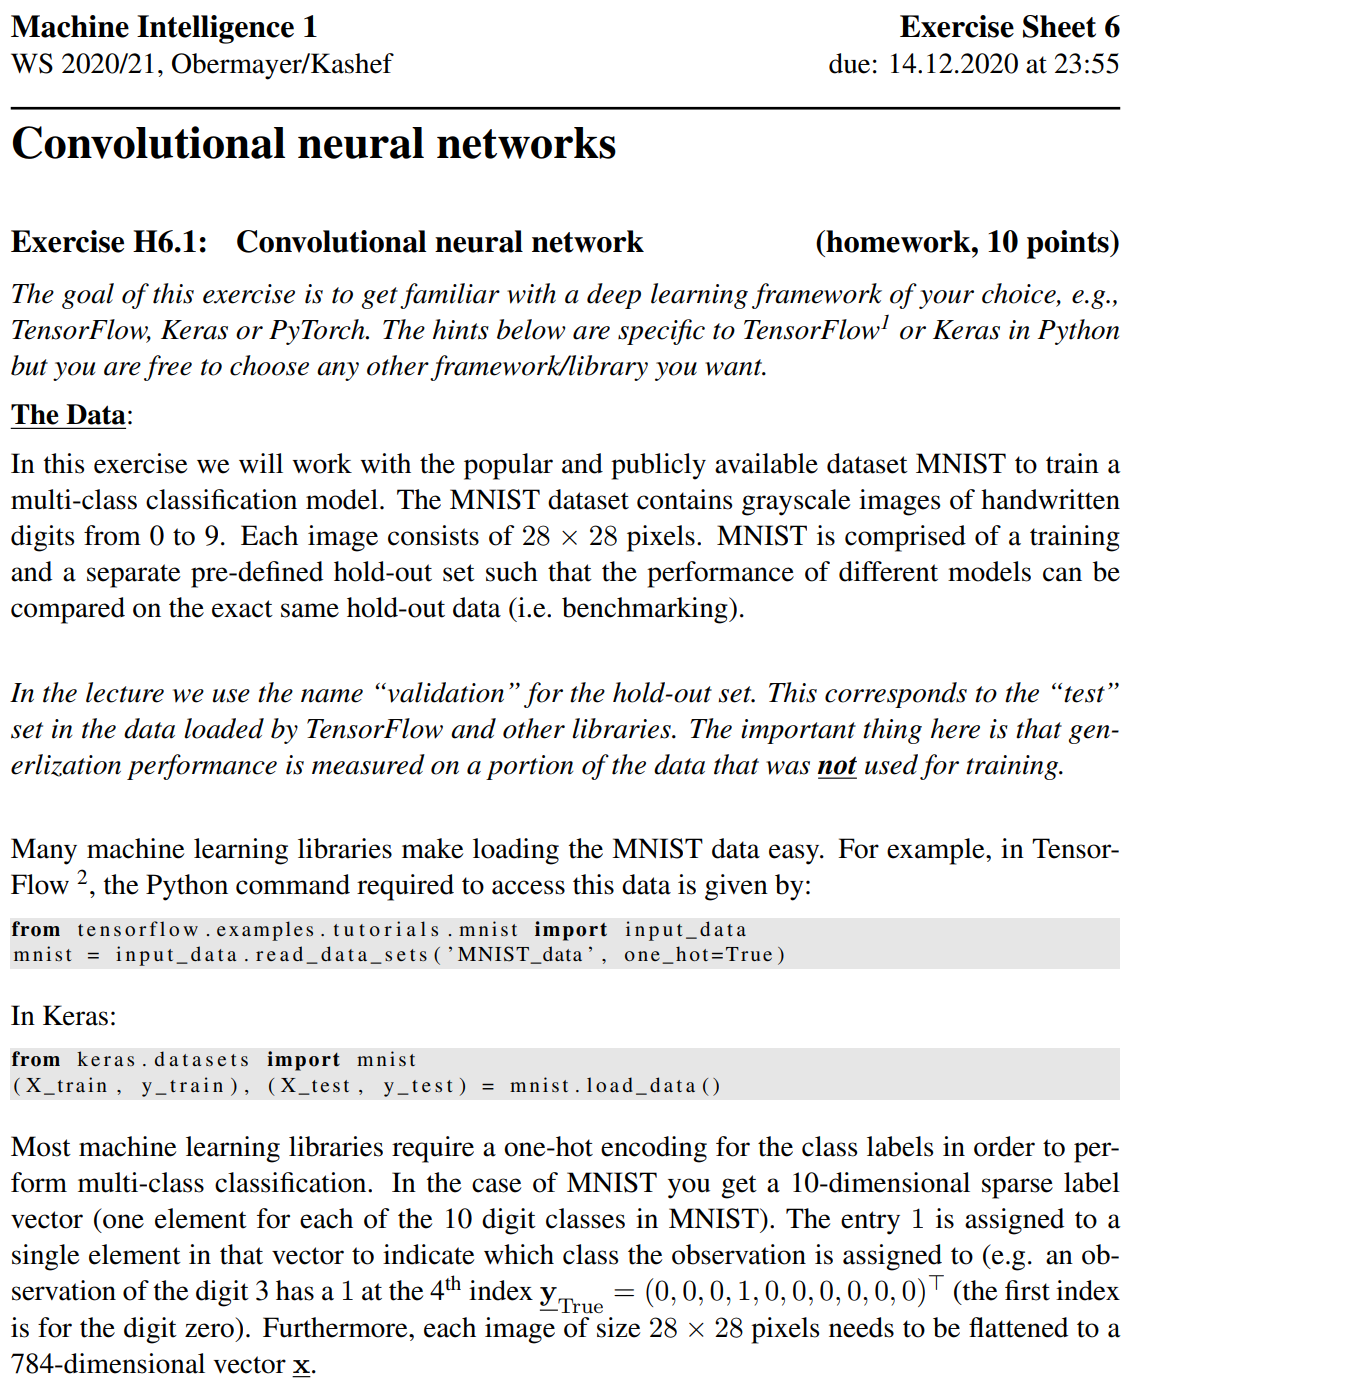

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.utils import  to_categorical
from keras.models import Sequential
from keras.layers import  Dense, Dropout, Conv2D, MaxPooling2D , Input , Flatten
from keras.initializers import TruncatedNormal, Constant
from keras.optimizers import SGD, Adam
from keras import callbacks
import datetime

In [2]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# preprocessing
n_train = X_train.shape[0]
n_test   = X_test.shape[0]
img_height = X_train.shape[1]
img_width  = X_train.shape[2]

X_train = X_train.reshape((n_train, img_width * img_height))
X_test  = X_test.reshape((n_test, img_width * img_height))

y_train = to_categorical(y_train, num_classes=10)    
y_test = to_categorical(y_test, num_classes=10)

In [3]:

class custom_callback(callbacks.Callback):
    def on_train_begin(self, batch, logs={}):
        self.losses = []
        self.val_losses = []
        self.accuracy=[]
        self.val_accuracy=[]

    def on_batch_end(self, batch, logs={}):
        if batch % 100 == 0:                    # 1 iteration = 1 batch
            self.losses.append(logs.get('loss'))
            self.accuracy.append(logs.get('accuracy'))
            self.val_accuracy.append(self.model.evaluate(X_test, y_test)[1])  
            self.val_losses.append(self.model.evaluate(X_test, y_test)[0])
            #self.val_losses.append(logs.get('val_loss'))    

        return 


custom_history = custom_callback()

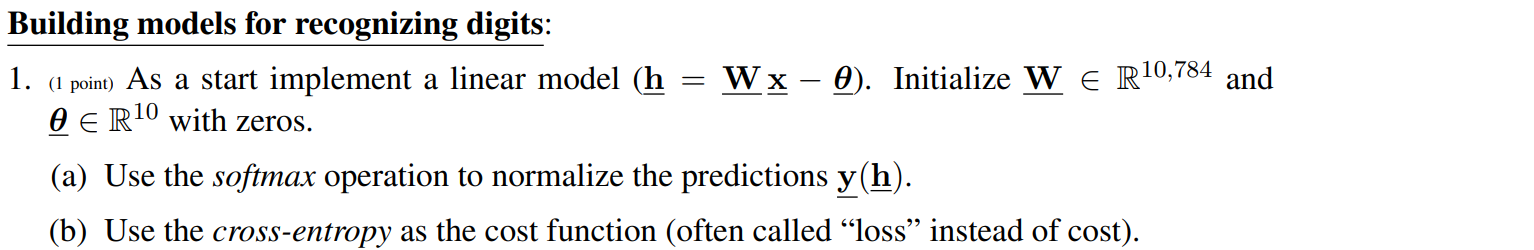

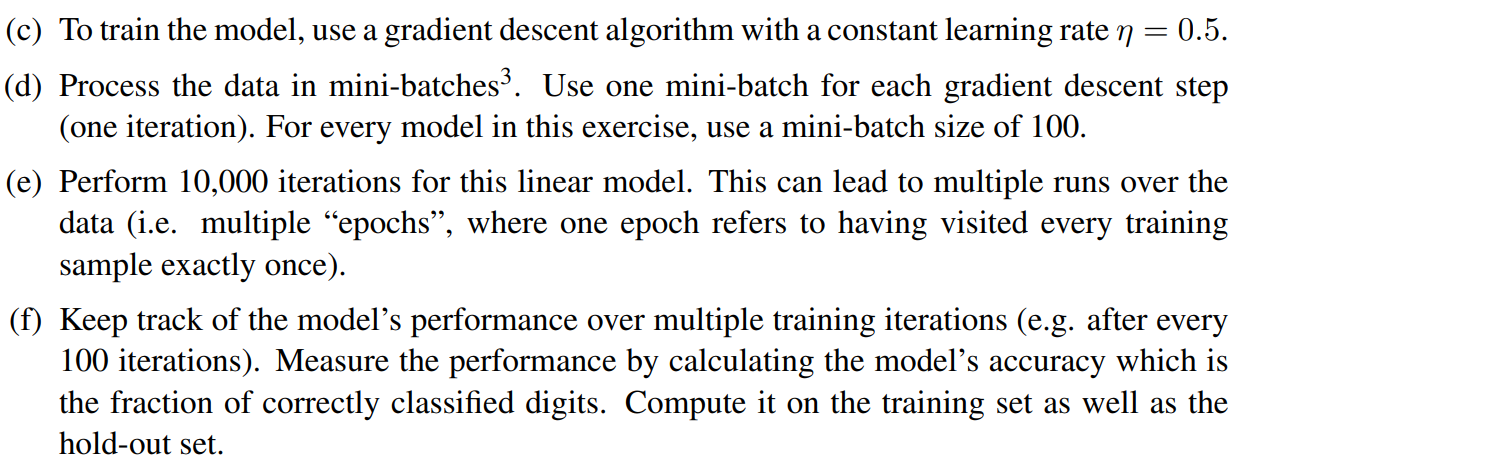

In [4]:
model = Sequential()
model.add(Dense(10, activation='softmax', kernel_initializer='zeros', bias_initializer='zeros', input_shape=(X_train.shape[1],)))
model.compile(loss='categorical_crossentropy', optimizer=SGD(0.5), metrics=['accuracy'])
history_linear = model.fit(X_train, y_train, batch_size=100, epochs= 34, verbose=2, validation_data=(X_test, y_test), shuffle = True,callbacks=[custom_history])
custom_history_linear={'accuracy':custom_history.accuracy,'losses':custom_history.losses,'val_accuracy':custom_history.val_accuracy,'val_losses':custom_history.val_losses}

Epoch 1/34
313/313 [==============================] - 1s 2ms/step - loss: 5690.9033 - accuracy: 0.8832
600/600 - 7s - loss: 7125.0977 - accuracy: 0.8665 - val_loss: 5485.0234 - val_accuracy: 0.8946
Epoch 2/34
100/100 [==============================] - 0s 2ms/step - loss: 15079.3486 - accuracy: 0.7681
600/600 - 3s - loss: 10818.1299 - accuracy: 0.8198 - val_loss: 4657.4492 - val_accuracy: 0.9002
Epoch 3/34
100/100 [==============================] - 0s 2ms/step - loss: 5381.6489 - accuracy: 0.8960
600/600 - 3s - loss: 5973.4424 - accuracy: 0.8851 - val_loss: 5300.6460 - val_accuracy: 0.8941
Epoch 4/34
100/100 [==============================] - 0s 2ms/step - loss: 5303.0918 - accuracy: 0.8981
600/600 - 3s - loss: 6115.2178 - accuracy: 0.8843 - val_loss: 6352.8237 - val_accuracy: 0.8806
Epoch 5/34
100/100 [==============================] - 0s 2ms/step - loss: 6873.0698 - accuracy: 0.8662
600/600 - 3s - loss: 6437.4028 - accuracy: 0.8749 - val_loss: 4684.5850 - val_accuracy: 0.9102
Epoch 6/

In [5]:
def plot_accuracy(history, model_name):
  plt.plot(history.history['accuracy'], label='Train: ' + model_name)
  plt.plot(history.history['val_accuracy'], label='Test: ' + model_name)
  plt.title("Model Accuracy")
  plt.xlabel("Epoch")
  plt.ylabel("Accuracy")
  plt.legend()
  plt.plot()

def plot_loss(history ,   model_name):
  plt.plot(history.history['loss'], label='Train: ' + model_name )
  plt.plot(history.history['val_loss'], label='Test: ' + model_name)
  plt.title("Model Loss")
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  plt.legend()
  plt.plot()

def plot_loss_callback(custom_history, model_name):
    
    plt.plot(custom_history['losses'], label='Train: ' + model_name)
    plt.plot(custom_history['val_losses'] , label='Test: ' + model_name)
    plt.title("Model Loss Every 100 Iterations")
    plt.xlabel("Iteration (in 100s)")
    plt.ylabel("Loss")
    plt.legend()
    plt.plot()

def plot_accuracy_callback(custom_history, model_name):
    
    plt.plot(custom_history['accuracy'], label='Train: ' + model_name)
    plt.plot(custom_history['val_accuracy'] , label='Test: ' + model_name)
    plt.title("Model Accuracy Every 100 Iterations")
    plt.xlabel("Iteration (in 100s)")
    plt.ylabel("Acuuracy")
    plt.legend()
    plt.plot()


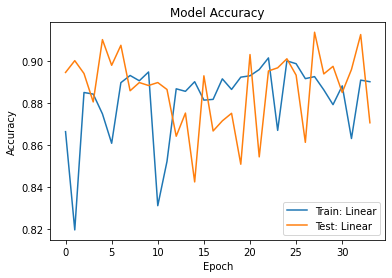

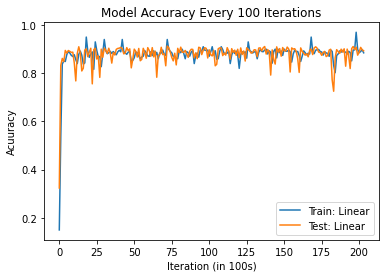

In [6]:
plot_accuracy(history_linear, 'Linear') # Plotting every epoch
plt.show()
plot_accuracy_callback(custom_history_linear, model_name= 'Linear')    # Plotting every 100 iterations


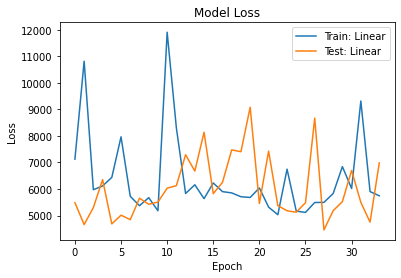

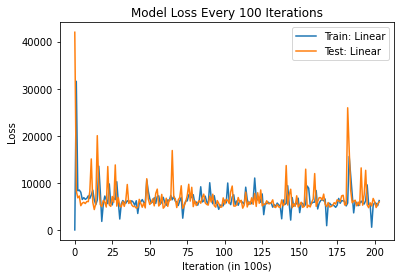

In [7]:
plot_loss(history_linear, 'Linear')
plt.show()
plot_loss_callback(custom_history_linear, 'Linear')


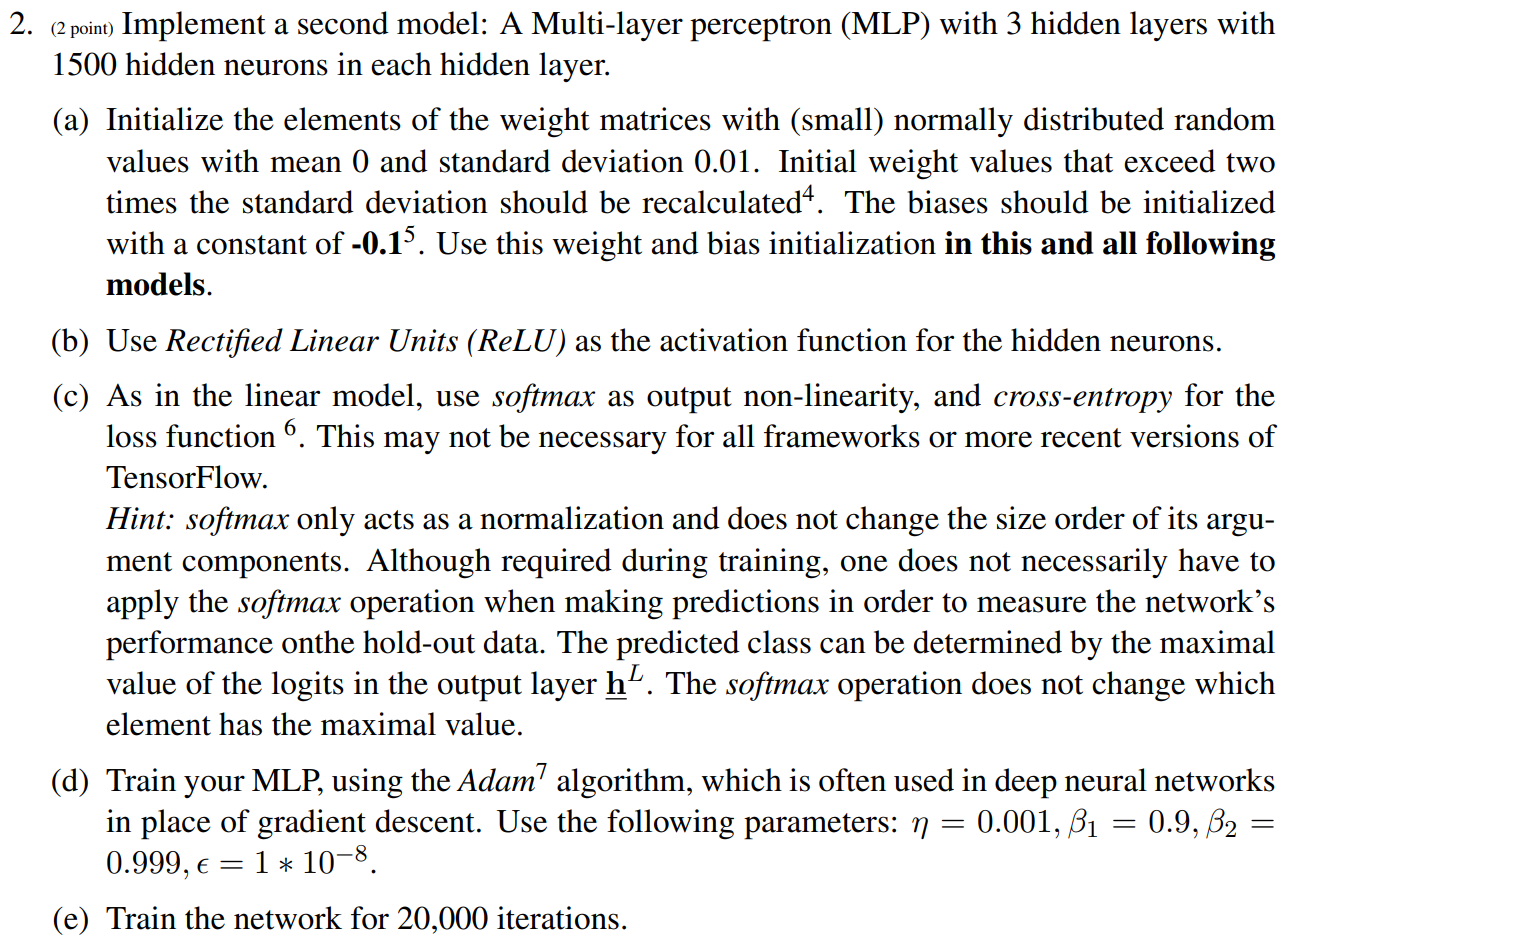

In [8]:


def initialize_weights():
  w1 = TruncatedNormal(mean=0.0, stddev=0.01)
  w1((X_train.shape[1], 1500))
  w2 = TruncatedNormal(mean=0.0, stddev=0.01)
  w2((1500, 1500))
  w3 = TruncatedNormal(mean=0.0, stddev=0.01)
  w3((1500, 1500))
  w4 = TruncatedNormal(mean=0.0, stddev=0.01)
  w4((1500, 10))

  return w1, w2, w3, w4

w1, w2, w3, w4 = initialize_weights()
model = Sequential()
model.add(Dense(1500, activation='relu', input_shape=(X_train.shape[1],), kernel_initializer=w1, bias_initializer=Constant(0.1)))
model.add(Dense(1500, activation='relu', kernel_initializer=w2, bias_initializer=Constant(0.1)))
model.add(Dense(1500, activation='relu', kernel_initializer = w3, bias_initializer=Constant(0.1)))
model.add(Dense(10, activation='softmax', kernel_initializer=w4, bias_initializer=Constant(0.1)))

In [9]:
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1*10**(-8))
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

history_mlp = model.fit(X_train, y_train, batch_size=100, epochs=34, verbose=1, validation_data=(X_test, y_test), shuffle= True,callbacks=[custom_history])
custom_history_mlp={'accuracy':custom_history.accuracy,'losses':custom_history.losses,'val_accuracy':custom_history.val_accuracy,'val_losses':custom_history.val_losses}

Epoch 1/34
600/600 [==============================] - 8s 14ms/step - loss: 0.1765 - accuracy: 0.9505 - val_loss: 0.1548 - val_accuracy: 0.9551
Epoch 2/34
600/600 [==============================] - 4s 7ms/step - loss: 0.1329 - accuracy: 0.9644 - val_loss: 0.1210 - val_accuracy: 0.9677
Epoch 3/34
600/600 [==============================] - 4s 7ms/step - loss: 0.1161 - accuracy: 0.9697 - val_loss: 0.1366 - val_accuracy: 0.9686
Epoch 4/34
600/600 [==============================] - 4s 7ms/step - loss: 0.1221 - accuracy: 0.9699 - val_loss: 0.1141 - val_accuracy: 0.9712
Epoch 5/34
600/600 [==============================] - 4s 7ms/step - loss: 0.1067 - accuracy: 0.9741 - val_loss: 0.1266 - val_accuracy: 0.9705
Epoch 6/34
600/600 [==============================] - 4s 7ms/step - loss: 0.1112 - accuracy: 0.9746 - val_loss: 0.1542 - val_accuracy: 0.9626
Epoch 7/34
600/600 [==============================] - 4s 7ms/step - loss: 0.0815 - accuracy: 0.9795 - val_loss: 0.1081 - val_accuracy: 0.9768
Epoch

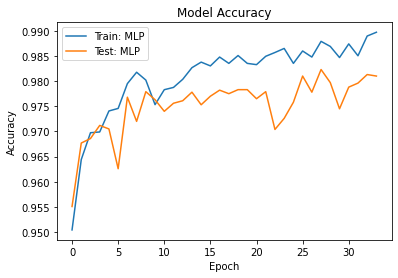

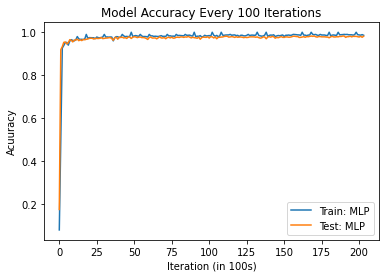

In [10]:
plot_accuracy(history_mlp, 'MLP') # Plotting every epoch
plt.show()
plot_accuracy_callback(custom_history_mlp, model_name= 'MLP')    # Plotting every 100 iterations

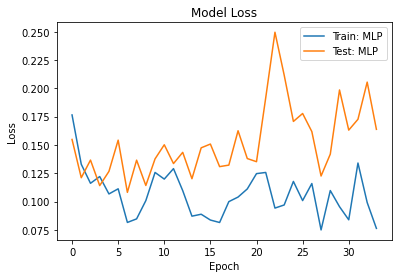

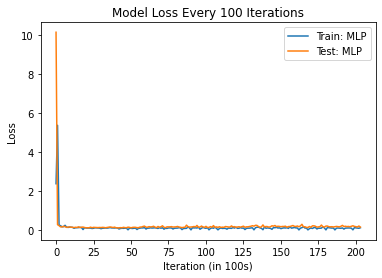

In [11]:
plot_loss(history_mlp, 'MLP')
plt.show()
plot_loss_callback(custom_history_mlp, 'MLP')


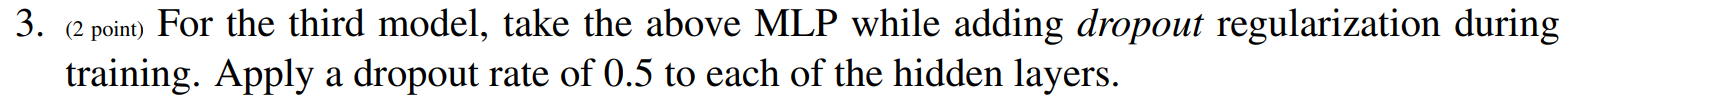

In [12]:
w1, w2, w3, w4 = initialize_weights()

model = Sequential()
model.add(Dense(1500, activation='relu', input_shape=(X_train.shape[1],), kernel_initializer=w1, bias_initializer=Constant(0.1)))
model.add(Dropout(0.5))
model.add(Dense(1500, activation='relu', kernel_initializer=w2, bias_initializer=Constant(0.1)))
model.add(Dropout(0.5))
model.add(Dense(1500, activation='relu', kernel_initializer = w3, bias_initializer=Constant(0.1)))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax', kernel_initializer=w4, bias_initializer=Constant(0.1)))

In [13]:
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1*10**(-8))
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

history_mlp_dropout = model.fit(X_train, y_train, batch_size=100, epochs=34, verbose=2, validation_data=(X_test, y_test), shuffle= True,callbacks=[custom_history])
custom_history_mlp_dropout={'accuracy':custom_history.accuracy,'losses':custom_history.losses,'val_accuracy':custom_history.val_accuracy,'val_losses':custom_history.val_losses}

Epoch 1/34
313/313 [==============================] - 1s 2ms/step - loss: 0.1963 - accuracy: 0.9463
600/600 - 8s - loss: 0.3050 - accuracy: 0.9183 - val_loss: 0.1920 - val_accuracy: 0.9513
Epoch 2/34
100/100 [==============================] - 0s 2ms/step - loss: 0.1996 - accuracy: 0.9496
600/600 - 4s - loss: 0.3037 - accuracy: 0.9253 - val_loss: 0.2060 - val_accuracy: 0.9498
Epoch 3/34
100/100 [==============================] - 0s 2ms/step - loss: 0.2067 - accuracy: 0.9557
600/600 - 4s - loss: 0.3148 - accuracy: 0.9293 - val_loss: 0.2410 - val_accuracy: 0.9496
Epoch 4/34
100/100 [==============================] - 0s 2ms/step - loss: 0.2107 - accuracy: 0.9555
600/600 - 4s - loss: 0.3366 - accuracy: 0.9274 - val_loss: 0.2314 - val_accuracy: 0.9505
Epoch 5/34
100/100 [==============================] - 0s 2ms/step - loss: 0.2379 - accuracy: 0.9562
600/600 - 4s - loss: 0.3329 - accuracy: 0.9299 - val_loss: 0.2019 - val_accuracy: 0.9540
Epoch 6/34
100/100 [==============================] - 0

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1500)              1177500   
_________________________________________________________________
dropout (Dropout)            (None, 1500)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1500)              2251500   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1500)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 1500)              2251500   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1500)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)               

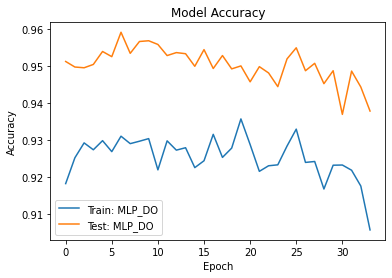

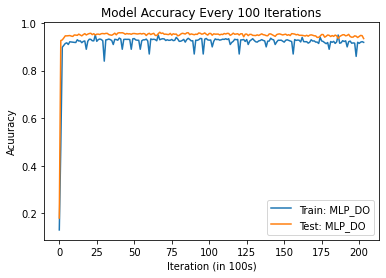

In [15]:
plot_accuracy(history_mlp_dropout, 'MLP_DO') # Plotting every epoch
plt.show()
plot_accuracy_callback(custom_history_mlp_dropout, model_name= 'MLP_DO')    # Plotting every 100 iterations

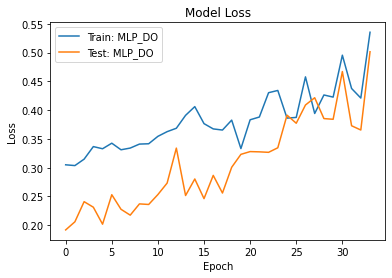

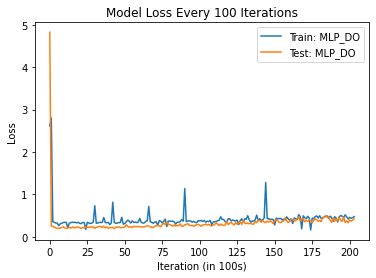

In [16]:
plot_loss(history_mlp_dropout, 'MLP_DO')
plt.show()
plot_loss_callback(custom_history_mlp_dropout, 'MLP_DO')

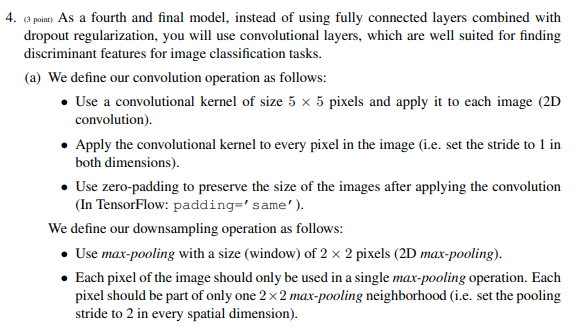

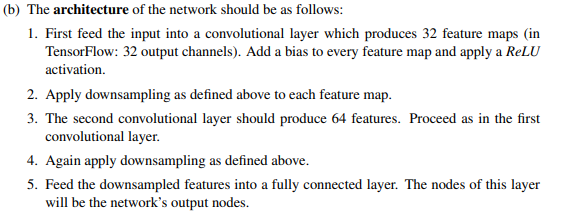

In [17]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# preprocessing
n_train = X_train.shape[0]
n_test   = X_test.shape[0]
img_height = X_train.shape[1]
img_width  = X_train.shape[2]

X_train = X_train.reshape(list(X_train.shape) + [1])  
X_test = X_test.reshape(list(X_test.shape) + [1])  

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

input_shape = X_train.shape[1:]

In [18]:
BATCH_SIZE = 100

model = Sequential()

# Add Convolutional Layers

w1 = TruncatedNormal(mean=0.0, stddev=0.01)
w1((64,10))

# Input Layer
model.add(Input(shape = input_shape))
# 1st Conv Layer
model.add(Conv2D(32 ,  kernel_size=(4,4), strides=(1,1) , padding = 'same'  , activation = 'relu' , bias_initializer=Constant(0.1)) )
# 1st Maxpooling Operation
model.add(MaxPooling2D( pool_size=(2, 2) ))
# 2nd Conv Layer
model.add(Conv2D(64 ,  kernel_size=(4,4), strides=(1,1) , padding = 'same'  , activation= 'relu' , bias_initializer=Constant(0.1)  ))
# 2nd Maxpooling Operation
model.add(MaxPooling2D( pool_size=(2, 2) ))

model.add(Flatten())

# Final Dense Output Layer
model.add(Dense(10, activation='softmax' , kernel_initializer = w1 ,  bias_initializer=Constant(0.1) ))


model.compile(optimizer = Adam(learning_rate=0.001) , loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        32832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                31370     
Total params: 64,746
Trainable params: 64,746
Non-trainable params: 0
__________________________________________________

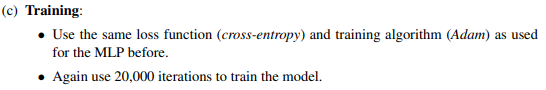

In [19]:
# Training 
history_convnet = model.fit(X_train, y_train, batch_size= BATCH_SIZE, epochs=34, steps_per_epoch= 600,  verbose=2, validation_data=(X_test, y_test), shuffle=True,callbacks=[custom_history])
custom_history_convnet={'accuracy':custom_history.accuracy,'losses':custom_history.losses,'val_accuracy':custom_history.val_accuracy,'val_losses':custom_history.val_losses}

Epoch 1/34
313/313 [==============================] - 1s 2ms/step - loss: 0.0543 - accuracy: 0.9826
600/600 - 9s - loss: 0.0652 - accuracy: 0.9799 - val_loss: 0.0564 - val_accuracy: 0.9797
Epoch 2/34
100/100 [==============================] - 0s 2ms/step - loss: 0.0477 - accuracy: 0.9838
600/600 - 4s - loss: 0.0513 - accuracy: 0.9840 - val_loss: 0.0416 - val_accuracy: 0.9862
Epoch 3/34
100/100 [==============================] - 0s 2ms/step - loss: 0.0410 - accuracy: 0.9868
600/600 - 4s - loss: 0.0459 - accuracy: 0.9855 - val_loss: 0.0449 - val_accuracy: 0.9871
Epoch 4/34
100/100 [==============================] - 0s 2ms/step - loss: 0.0457 - accuracy: 0.9863
600/600 - 4s - loss: 0.0438 - accuracy: 0.9871 - val_loss: 0.0434 - val_accuracy: 0.9860
Epoch 5/34
100/100 [==============================] - 0s 2ms/step - loss: 0.0495 - accuracy: 0.9854
600/600 - 5s - loss: 0.0444 - accuracy: 0.9868 - val_loss: 0.0427 - val_accuracy: 0.9877
Epoch 6/34
100/100 [==============================] - 0

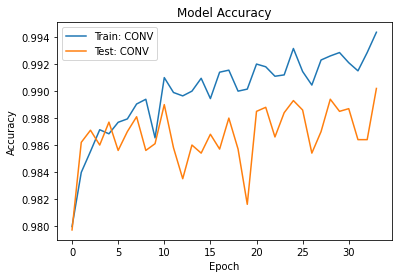

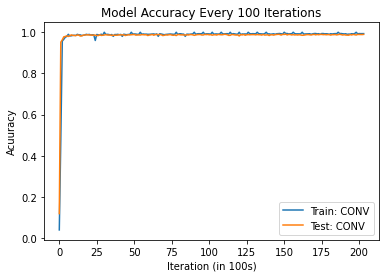

In [20]:
plot_accuracy(history_convnet, 'CONV') # Plotting every epoch
plt.show()
plot_accuracy_callback(custom_history_convnet, model_name= 'CONV')    # Plotting every 100 iterations

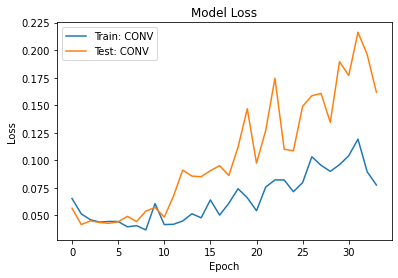

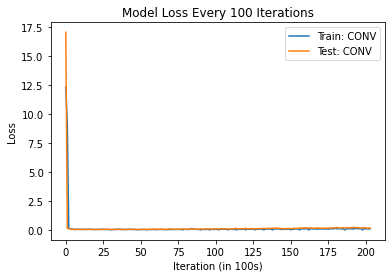

In [21]:
plot_loss(history_convnet, 'CONV')
plt.show()
plot_loss_callback(custom_history_convnet, 'CONV')

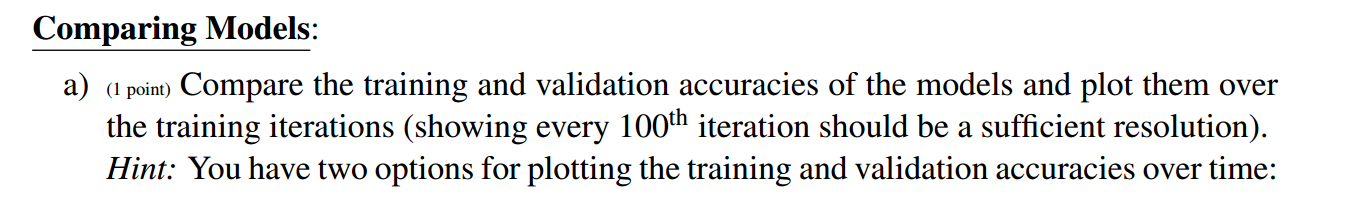

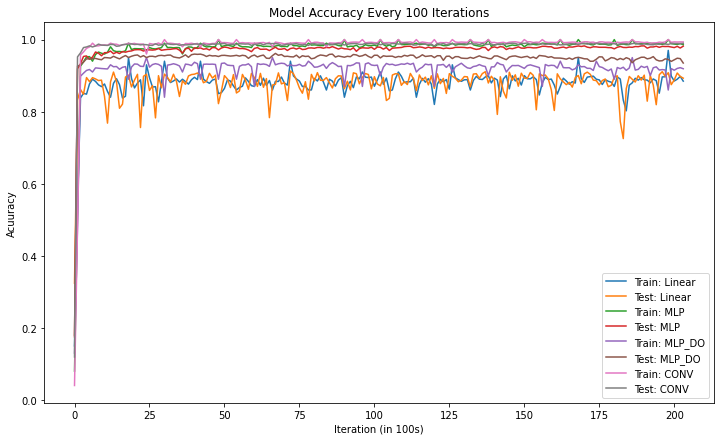

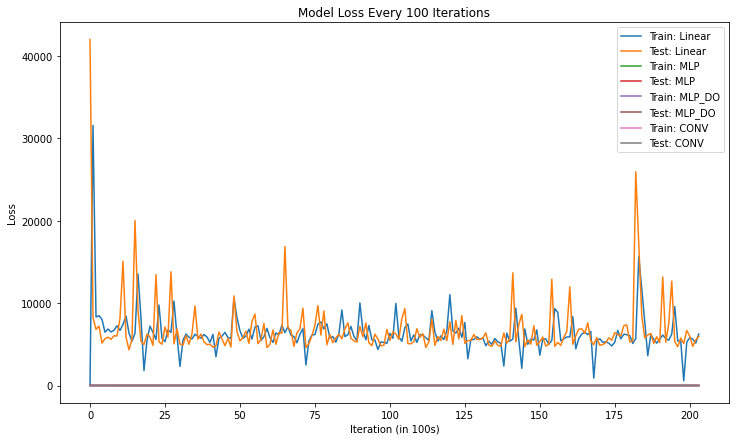

In [22]:
plt.rcParams["figure.figsize"] = (12,7)

# Accuracy Plots

plot_accuracy_callback(custom_history_linear, 'Linear')
plot_accuracy_callback(custom_history_mlp, 'MLP')
plot_accuracy_callback(custom_history_mlp_dropout, 'MLP_DO')
plot_accuracy_callback(custom_history_convnet, 'CONV')

plt.show()


# Loss Plots

plot_loss_callback(custom_history_linear, 'Linear') 
plot_loss_callback(custom_history_mlp, 'MLP')
plot_loss_callback(custom_history_mlp_dropout, 'MLP_DO')
plot_loss_callback(custom_history_convnet, 'CONV')

plt.show()

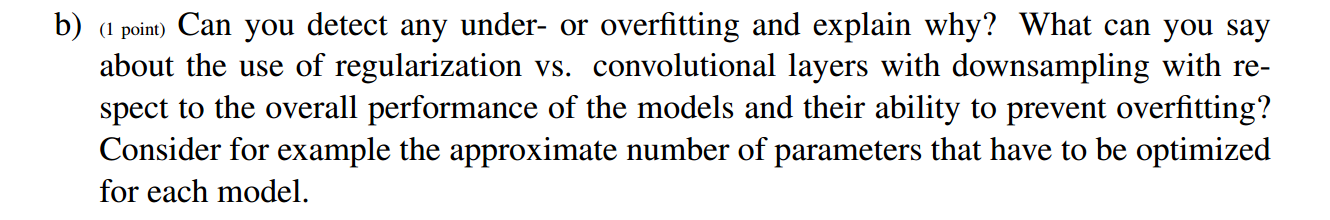

There is a slight overfitting in the MLP model with no regularisation because the accuracy of the model on the training dataset is higher than the accuracy obtained on the vaildation dataset.

The overall performance with the use of convolutional layers with downsampling is better than the use of regularization. This can be seen from the model accuracy of the model with convolutional layers being higher than the MLP with regularization. Also, convolutional layers minimise the number of parameters to be optimised when compared to the dense fully connected MLPs. Even with dropout regularization, number of parameters becomes very large when the depth of the MLP increases. So, with lesser number of parameters to optimise, the computational efficiency of the model using convolutional layers is higher. For example, convolutional layers contain around 64000 trainable parameters and the regularized MLP has around 5,700,000 trainable parameters.

The convolutional layers do a better job at preventing overfitting when compared to use of regularization because of the sparser connectivity.